In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torchvision
from torchvision import transforms

In [3]:
from torch.utils.data import Dataset, DataLoader, Subset

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# hyperparameters:
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# dataset has PIL Images of the range [0,1]. 
# we transform them to tensors of normalized range [-1,1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])

In [6]:
path = r"../../data/cifar/"

In [7]:
train_dataset = torchvision.datasets.CIFAR10(root=path, train=True, download=False, transform=transform)

In [8]:
test_dataset = torchvision.datasets.CIFAR10(root=path, train=False, download=False, transform=transform)

find out the size of this dataset:

In [11]:
len(train_dataset.data), len(test_dataset.data)

(50000, 10000)

In [13]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Lets visualise some of the images from the cifar 10 dataset:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

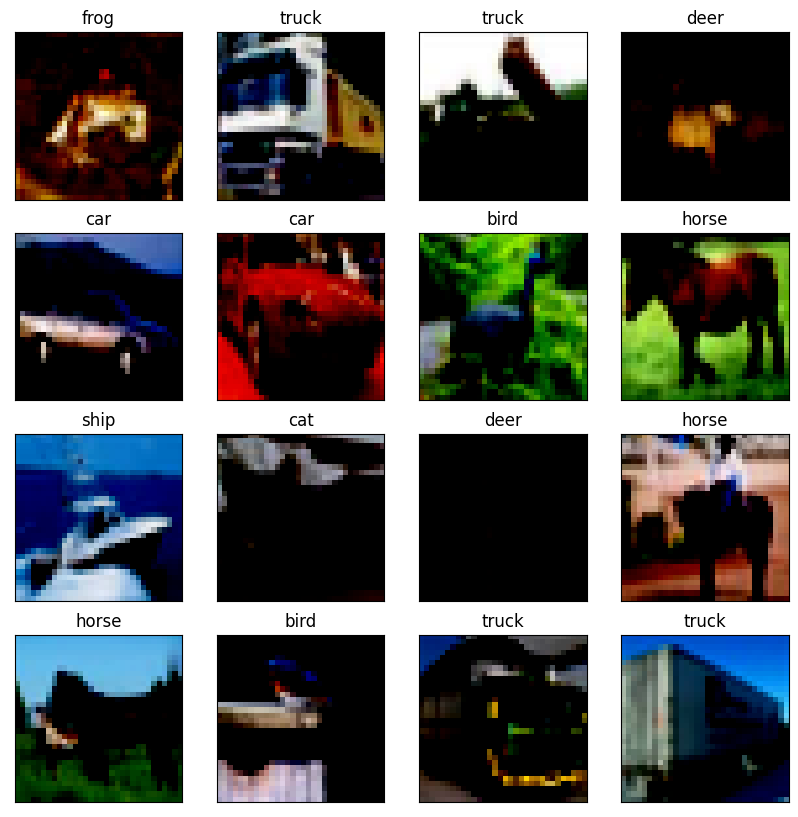

In [19]:
fig, ax = plt.subplots(4,4,figsize=(10,10))
counter = 0
for i in range(4):
    for j in range(4):
        image, label = train_dataset[counter]
        image = torch.permute(image, (1,2,0)).clone().numpy();
        ax[i,j].imshow(image);
        ax[i,j].set_title(f"{classes[label]}")
        ax[i,j].set_xticks([]); ax[i,j].set_yticks([]);
        counter+=1
        

In [20]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [21]:
train_dataset[0][0].shape

torch.Size([3, 32, 32])

In [40]:
len(train_loader)

12500

In [42]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5,padding='same')
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5,padding='same')
        self.fc1 = nn.Linear(16*8*8,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*8*8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [43]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

In [44]:
def train():
    train_loss = [0]*num_epochs
    train_acc = [0]*num_epochs

    for epoch in range(num_epochs):
        for image,label in train_loader:
            # perform the forward pass
            image = image.to(device)
            label = label.to(device)

            outputs = model(image)
            # compute the loss
            loss = criterion(outputs, label)
            # backpropagate
            loss.backward()
            # optimize
            optimizer.step()
            # clear the gradients
            optimizer.zero_grad()

            # metrics computation
            train_loss[epoch] += loss.item()*label.shape[0]

            train_acc[epoch] += (torch.argmax(outputs, dim=1) == label).float().sum()
        # print results at the end of each epoch
        train_loss[epoch] /= len(train_loader.dataset)
        train_acc[epoch] /= len(train_loader.dataset)
        print(f'epoch: {epoch+1} | train loss: {train_loss[epoch]:.4f} | train acc : {train_acc[epoch]:.4f}')
    return train_loss, train_acc        



In [ ]:
hist = train()

epoch: 1 | train loss: 2.2725 | train acc : 0.1547
epoch: 2 | train loss: 1.8269 | train acc : 0.3391
epoch: 3 | train loss: 1.5568 | train acc : 0.4360
epoch: 4 | train loss: 1.4294 | train acc : 0.4865


: 